# Perceptron studies

  Este tópico abordará a criação de um simples perceptron.
Um perceptron é uma unidade básica de uma rede neural artificial, comumente utilizada em modelos de aprendizado de máquina. Ele é inspirado no funcionamento dos neurônios no cérebro humano. Um perceptron recebe entradas, aplica pesos a essas entradas, soma esses produtos ponderados e, em seguida, aplica uma função de ativação para gerar a saída.

A fórmula de um perceptron pode ser representada por:

> y=f(∑i=1n​(xi​⋅wi​)+b)


In [ ]:
x_input = [0.1, 0.5, 0.2]
w_weights = [0.4, 0.3, 0.6]
threshold = 0.5

def step(weighted_sum):
        if weighted_sum > threshold:
            return 1
        else:
            return 0

def perceptron():
        weighted_sum = 0
        for x,y in zip(x_input, w_weights):
            weighted_sum += x*y
            print(weighted_sum)
        return step(weighted_sum)

output = perceptron()
print("output: " + str(output))

0.04000000000000001
0.19
0.31
output: 0


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 26 10:10:36 2021

@author: Vieira
"""

#%% Import modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

print(np.__name__ + " version = " + np.__version__)
print(mpl.__name__ + " version = " + mpl.__version__)

#%% Generate random data
np.random.seed(1)

xlim = (-10, 10)
ylim = (-10, 10)
step = 0.02

#%%
N = 50

c1 = np.random.randn(N,2) + np.array([-1, 0])
c2 = np.random.randn(N,2) + np.array([ 3, 5])

X = np.vstack((c1,c2))
y = np.vstack((-1*np.ones((N,1)), np.ones((N,1))))

#%%
def sgn(x):
    return (1 if x >= 0 else -1)

def predict(w, x):
    return sgn(np.dot(w.T, x))

def get_dec_boundary(w):
    xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], step),
                         np.arange(ylim[0], ylim[1], step))
    samples = np.vstack([np.ones((xx.size)), xx.ravel(), yy.ravel()])
    z = np.dot(w.T,samples)
    z[z>=0] = 1
    z[z<0] = 0
    return xx, yy, z.reshape(xx.shape)

def get_line(w):
    x1 = np.linspace(xlim[0], xlim[1], 2)
    x2 = ( -w[0] - w[1]*x1 ) / w[2]
    return x1, x2

def plot_data(X, y, w, ind = 0):

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1)

    plt.plot(X[y.ravel() ==  1,0], X[y.ravel() ==  1,1], 'go')
    plt.plot(X[y.ravel() == -1,0], X[y.ravel() == -1,1], 'ro')

    # Plot the separation line
    x1, x2 = get_line(w)
    plt.plot(x1, x2, '-k')
    # Plot
    plt.plot(X[ind,0], X[ind,1], 'ko')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    xx, yy, zz = get_dec_boundary(w)
    plt.contourf(xx, yy, zz, cmap=plt.cm.RdYlGn)

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.show()

#%%
# for i in range(10):
i = 5
w = np.array([i, 1, 1])

plot_data(X, y, w, i)

#%%

# Initialize weigths
# w = np.zeros((3,1))# np.random.random((3,1))
w = 10. * np.random.random((3,1))
w = w/ np.linalg.norm(w)

epochs = range(200)
eta = .2

for epoch in epochs:
  for i in range(X.shape[0]):
    x = np.hstack([1, X[i,:]]).reshape((3,1))
    y_gt = y[i]
    y_hat = predict(w, x)
    w = w + eta * (y_gt - y_hat) * x
    plot_data(X, y, w, i)
plot_data(X, y, w, i)

#%%
w = np.random.random((3,1))
epochs = range(5) #%% hyperparameter
eta = 1           #%% hyperparameter

for epoch in epochs:
  for i in range(X.shape[0]):
    x = np.hstack([1, X[i,:]]).reshape((3,1))
    y_gt = y[i]
    y_hat = predict(w, x)
    w = w + eta * (y_gt - y_hat) * x
    plot_data(X, y, w, i)
plot_data(X, y, w, i)

# Perceptron somente com NumPy
Neste módulo será criado um perceptron para classificação de dados utilizando somente a bilbioteca NumPy para tal dever. Matplotlib e sklearn doram utilizados para plotar gráficos e gerar valores randômicos.

Acurácia do Perceptron: 95.00%


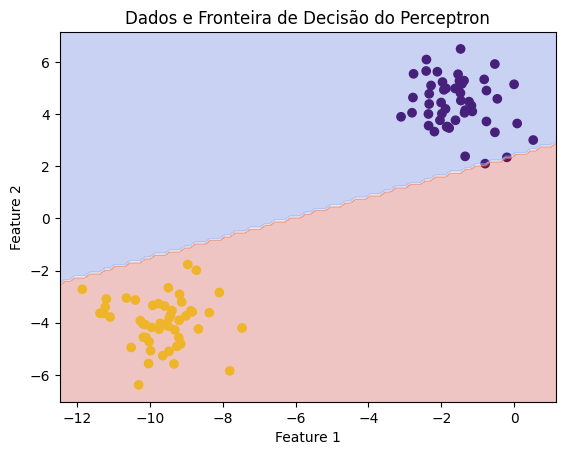

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Função de ativação (step function)
def step_function(x):
    return np.where(x > 0, 1, 0)

# Função para treinar o perceptron
def train_perceptron(X_train, y_train, learning_rate=0.01, epochs=200):
    # Adicionar uma coluna de 1 para o termo de polarização (bias)
    X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

    # Inicializar pesos aleatórios
    np.random.seed(42)
    weights = np.random.rand(X_train_bias.shape[1])

    for epoch in range(epochs):
        # Calcular a saída do perceptron
        predictions = step_function(np.dot(X_train_bias, weights))

        # Atualizar os pesos com base no erro
        error = y_train - predictions
        weights += learning_rate * np.dot(error, X_train_bias) / len(X_train)

    return weights

# Função para calcilar a acurácia
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

# Gerar dados
X, y = make_blobs(centers=2, cluster_std=1, random_state=1)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o perceptron
weights = train_perceptron(X_train, y_train)

# Adicionar uma coluna de 1 para o termo de polarização (bias) nos dados de teste
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Fazer previsões no conjunto de teste
y_pred = step_function(np.dot(X_test_bias, weights))

# Calcular a acurácia
accuracia = accuracy(y_test, y_pred)
print(f'Acurácia do Perceptron: {accuracia * 100:.2f}%')

# Plotar os dados e a fronteira de decisão do perceptron
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Dados e Fronteira de Decisão do Perceptron')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotar a fronteira de decisão
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = step_function(np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], weights))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.show()
